# New Section

In [ ]:
#######Alpha Global

In [ ]:
##########infection

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Alpha-Delta dataset.csv to Alpha-Delta dataset.csv


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

df= pd.read_csv("Alpha-Delta dataset.csv",usecols=['infection_Alpha_Global'])


In [ ]:
df1= pd.read_csv("Alpha-Delta dataset.csv",usecols=['infection_Alpha_Global'])
window=7
rolling = df1.rolling(window)
df1 = rolling.mean()
for i in range(window-1):
    df1.iloc[i]=df.iloc[i]
df = df1
df = df.dropna()

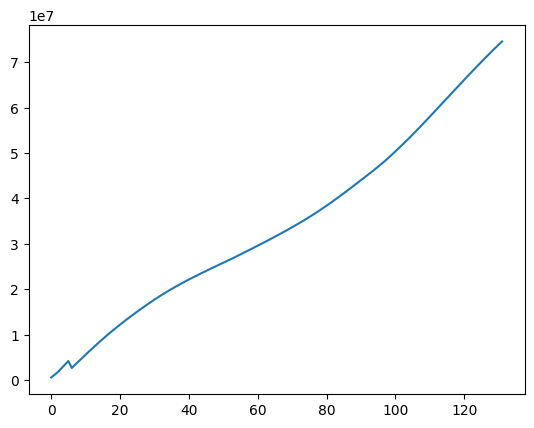

In [ ]:
plt.plot(df)

In [ ]:
#determining parameters
#d
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['infection_Alpha_Global'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 3.018364
p-value: 1.000000


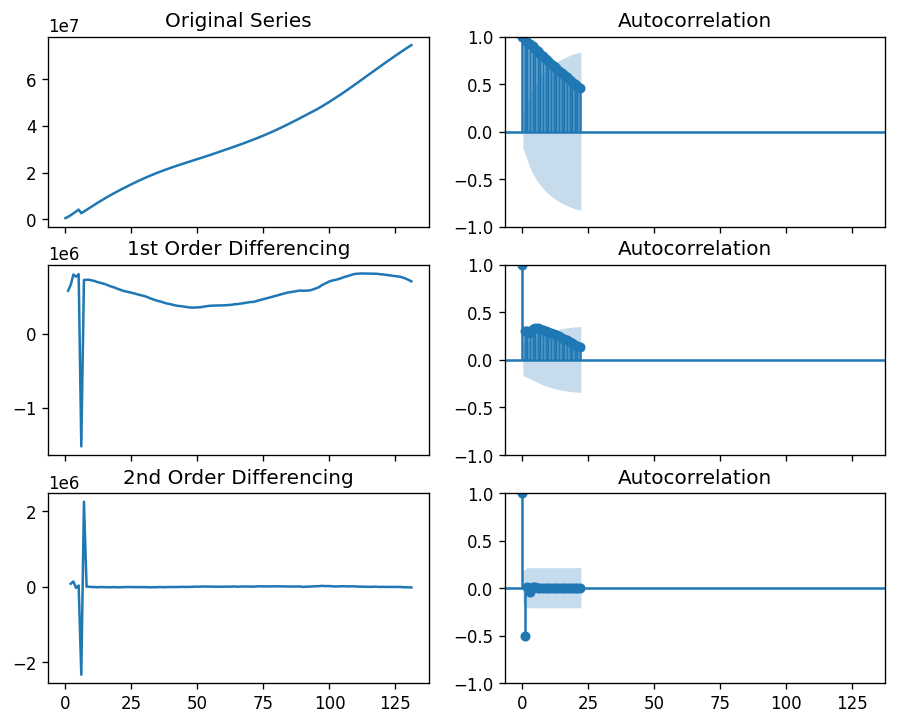

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['infection_Alpha_Global']); axes[0, 0].set_title('Original Series')
plot_acf(df['infection_Alpha_Global'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['infection_Alpha_Global'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['infection_Alpha_Global'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['infection_Alpha_Global'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['infection_Alpha_Global'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


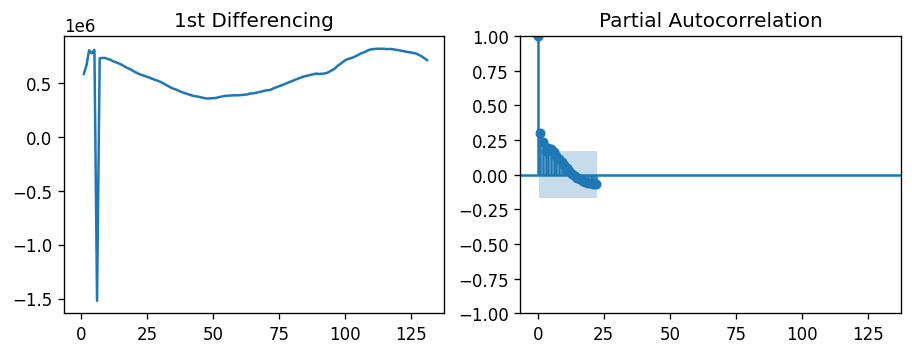

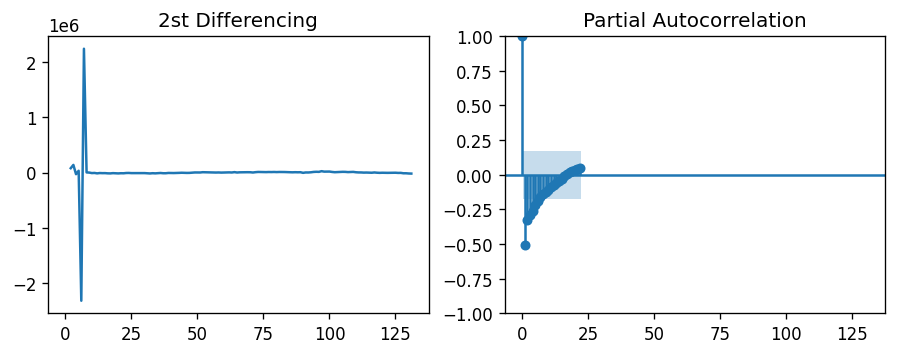

In [ ]:
#determining parameters
#p
# PACF plot of 1st or 2st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['infection_Alpha_Global'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['infection_Alpha_Global'].diff().dropna(), ax=axes[1])


fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['infection_Alpha_Global'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['infection_Alpha_Global'].diff().diff().dropna(), ax=axes[1])
plt.show()


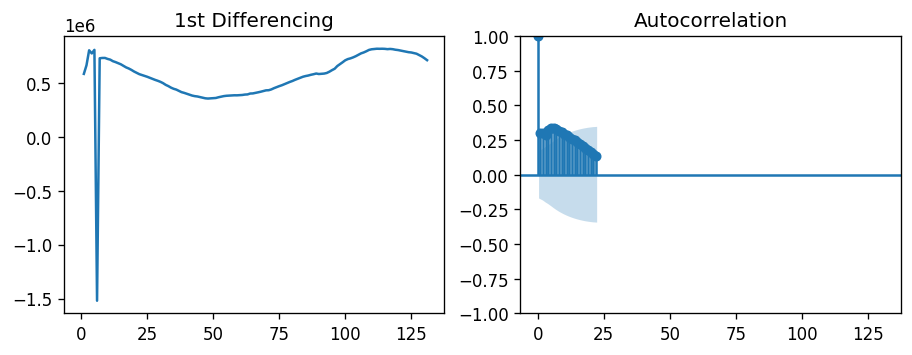

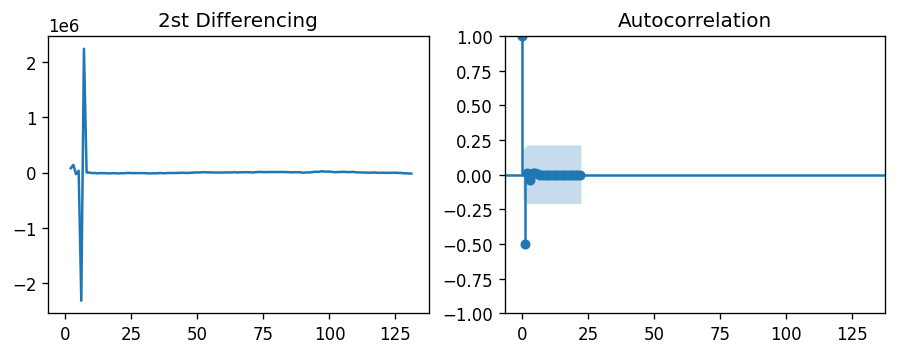

In [ ]:
#determining parameters
#q
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['infection_Alpha_Global'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['infection_Alpha_Global'].diff().dropna(), ax=axes[1])

# Import data
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['infection_Alpha_Global'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['infection_Alpha_Global'].diff().diff().dropna(), ax=axes[1])
plt.show()




/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                 SARIMAX Results                                  
Dep. Variable:     infection_Alpha_Global   No. Observations:                  125
Model:                     ARIMA(1, 2, 2)   Log Likelihood               -1787.250
Date:                    Mon, 17 Apr 2023   AIC                           3582.499
Time:                            18:58:20   BIC                           3593.748
Sample:                                 0   HQIC                          3587.069
                                    - 125                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6599      0.015     44.008      0.000       0.631       0.689
ma.L1         -1.9375      0.011   -175.375      0.000      -1.959      -1.916
ma.L2          1.000

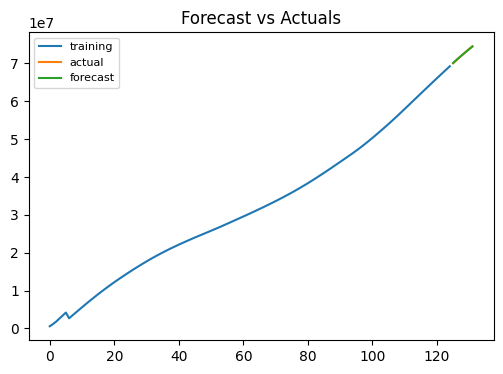

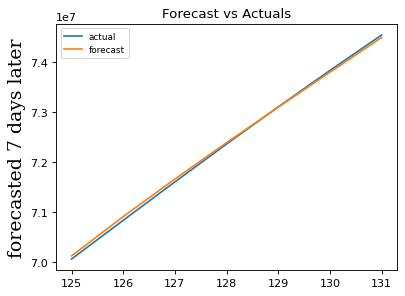

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=7
# Create Training and Test
train = df['infection_Alpha_Global'][:len(df)-n_future]
test = df['infection_Alpha_Global'][len(df)-n_future:]

model = ARIMA(train, order=(1, 2, 2))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Plot
font1 = {'family':'Serif','color':'black','size':17}
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 7 days later", fontdict = font1)
plt.show()


In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.0006236744198752288,
 'me': 19012.459716196572,
 'mae': 44827.630777244056,
 'mpe': 0.0002756245365425038,
 'rmse': 49939.89613922421}

                                 SARIMAX Results                                  
Dep. Variable:     infection_Alpha_Global   No. Observations:                  118
Model:                     ARIMA(1, 2, 1)   Log Likelihood               -1592.752
Date:                    Mon, 17 Apr 2023   AIC                           3191.504
Time:                            19:00:38   BIC                           3199.765
Sample:                                 0   HQIC                          3194.857
                                    - 118                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0737      0.087     -0.848      0.396      -0.244       0.097
ma.L1         -0.8567      0.039    -22.022      0.000      -0.933      -0.780
sigma2      5.725e+1

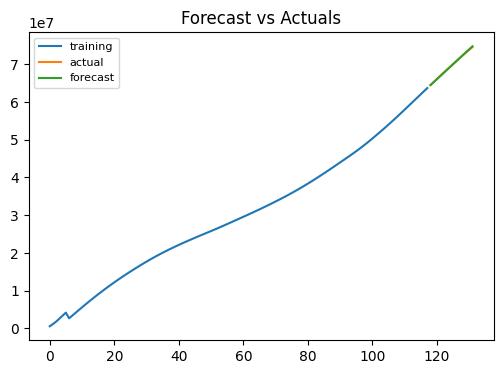

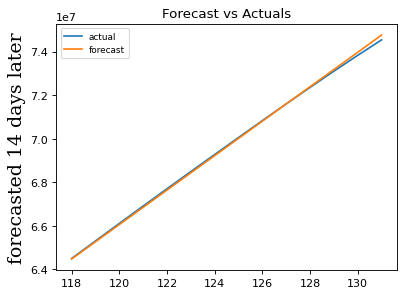

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=14
# Create Training and Test
train = df['infection_Alpha_Global'][:len(df)-n_future]
test = df['infection_Alpha_Global'][len(df)-n_future:]

model = ARIMA(train, order=(1, 2, 1))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# Plot
font1 = {'family':'Serif','color':'black','size':17}
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 14 days later", fontdict = font1)
plt.show()


In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.0008834069686849802,
 'me': 4501.730580461344,
 'mae': 62653.775726734,
 'mpe': 2.480124976959196e-05,
 'rmse': 82633.12575586454}

                                 SARIMAX Results                                  
Dep. Variable:     infection_Alpha_Global   No. Observations:                  111
Model:                     ARIMA(5, 2, 1)   Log Likelihood               -1723.979
Date:                    Mon, 17 Apr 2023   AIC                           3461.957
Time:                            19:02:42   BIC                           3480.797
Sample:                                 0   HQIC                          3469.598
                                    - 111                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2362      0.016    -15.030      0.000      -0.267      -0.205
ar.L2         -0.2090      0.015    -13.919      0.000      -0.238      -0.180
ar.L3         -0.227

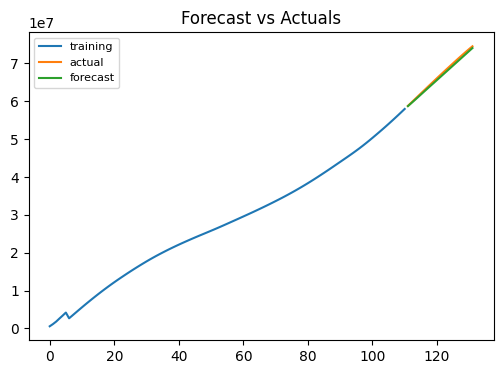

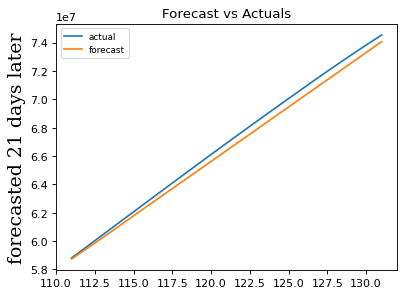

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=21
# Create Training and Test
train = df['infection_Alpha_Global'][:len(df)-n_future]
test = df['infection_Alpha_Global'][len(df)-n_future:]

model = ARIMA(train, order=(5, 2, 1))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# Plot
font1 = {'family':'Serif','color':'black','size':17}
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 21 days later", fontdict = font1)
plt.show()


In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.007938558800942392,
 'me': -543458.2634066141,
 'mae': 543458.2634066141,
 'mpe': -0.007938558800942392,
 'rmse': 588591.4489374417}

In [ ]:
#########

In [ ]:
##deaths

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

df= pd.read_csv("Alpha-Delta dataset.csv",usecols=['death_Alpha_Global'])


In [ ]:
df1= pd.read_csv("Alpha-Delta dataset.csv",usecols=['death_Alpha_Global'])
window=7
rolling = df1.rolling(window)
df1 = rolling.mean()
for i in range(window-1):
    df1.iloc[i]=df.iloc[i]
df = df1
df = df.dropna()

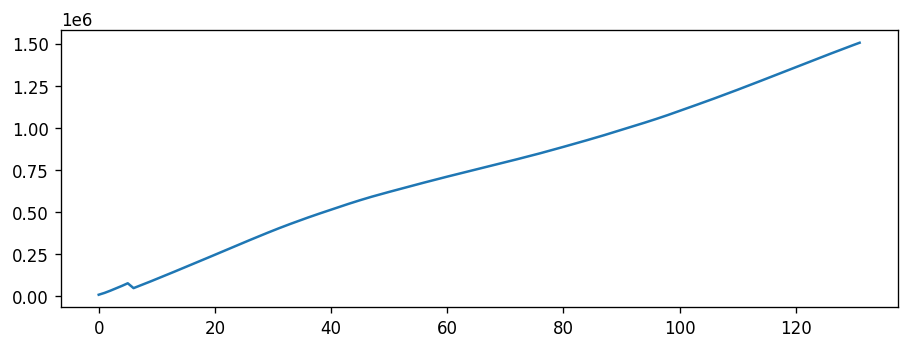

In [ ]:
plt.plot(df)

In [ ]:
#determining parameters
#d
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['death_Alpha_Global'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.413453
p-value: 0.981991


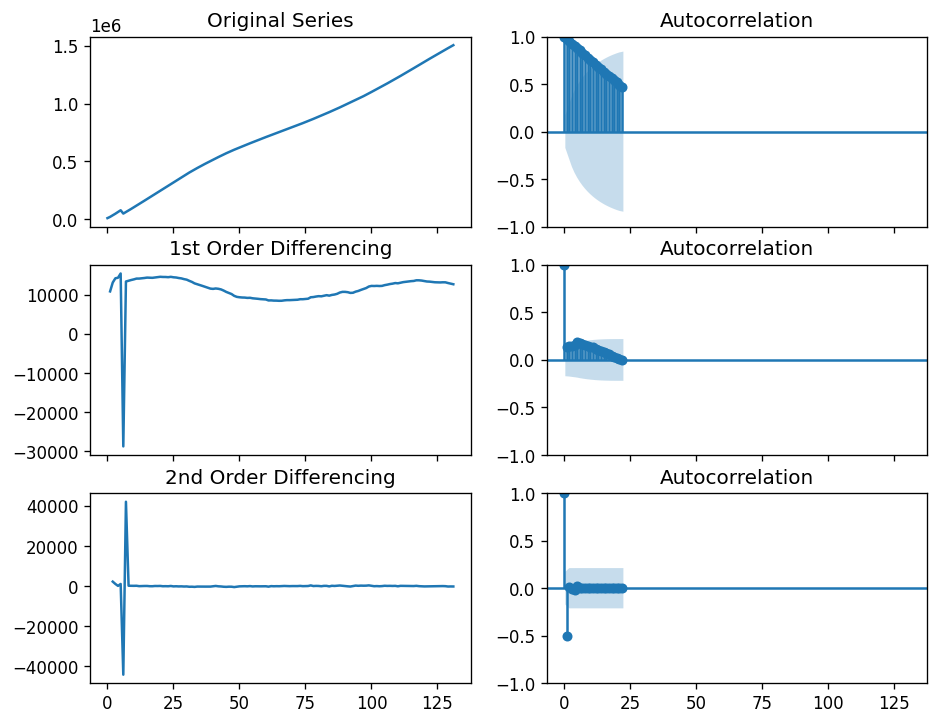

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['death_Alpha_Global']); axes[0, 0].set_title('Original Series')
plot_acf(df['death_Alpha_Global'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['death_Alpha_Global'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['death_Alpha_Global'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['death_Alpha_Global'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['death_Alpha_Global'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


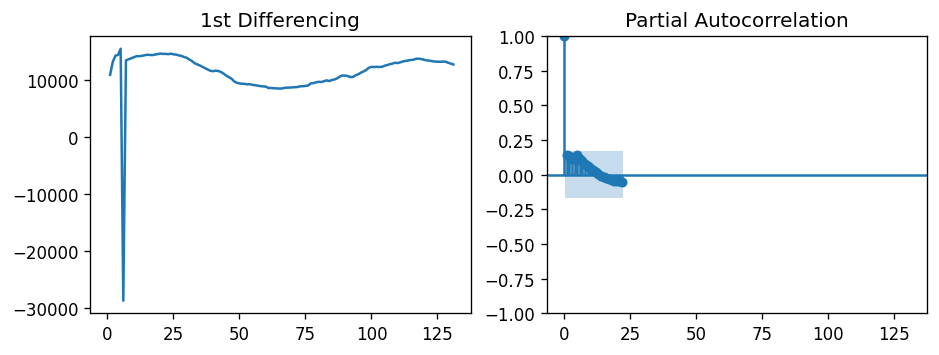

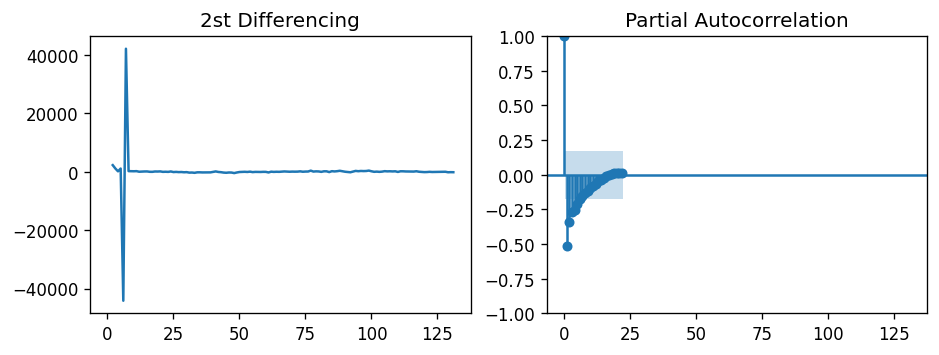

In [ ]:
#determining parameters
#p
# PACF plot of 1st or 2st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['death_Alpha_Global'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['death_Alpha_Global'].diff().dropna(), ax=axes[1])


fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['death_Alpha_Global'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['death_Alpha_Global'].diff().diff().dropna(), ax=axes[1])
plt.show()

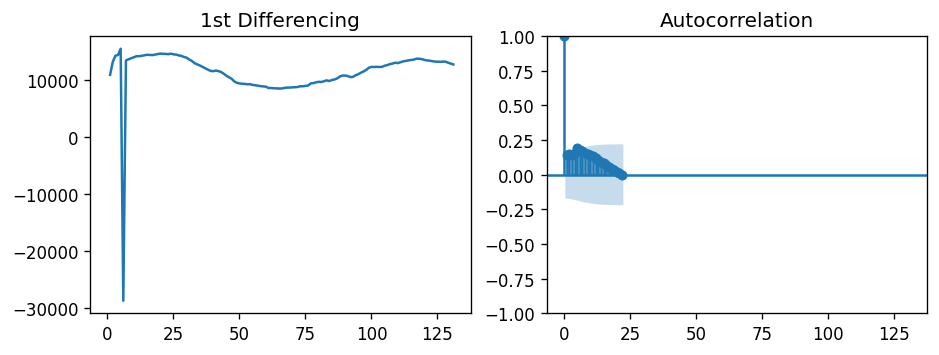

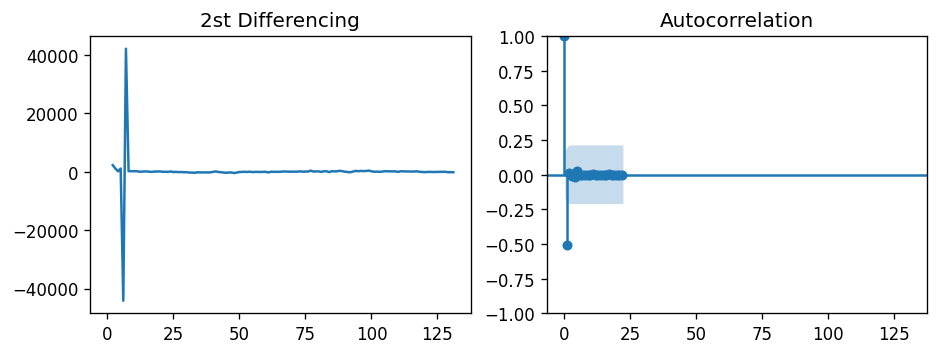

In [ ]:
#determining parameters
#q
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['death_Alpha_Global'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['death_Alpha_Global'].diff().dropna(), ax=axes[1])

# Import data
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['death_Alpha_Global'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['death_Alpha_Global'].diff().diff().dropna(), ax=axes[1])
plt.show()

                               SARIMAX Results                                
Dep. Variable:     death_Alpha_Global   No. Observations:                  125
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -1234.095
Date:                Mon, 17 Apr 2023   AIC                           2470.190
Time:                        19:05:33   BIC                           2473.002
Sample:                             0   HQIC                          2471.332
                                - 125                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.987e+07   6.83e+05     43.759      0.000    2.85e+07    3.12e+07
Ljung-Box (L1) (Q):                  32.44   Jarque-Bera (JB):             17427.89
Prob(Q):                              0.00   Pr

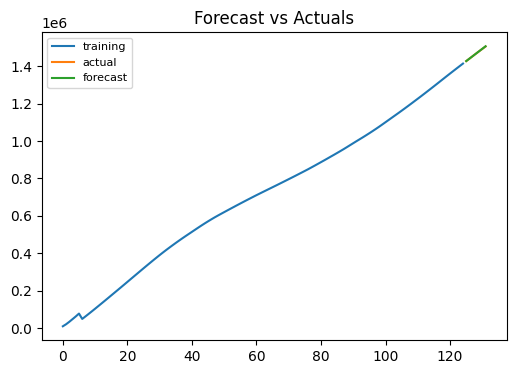

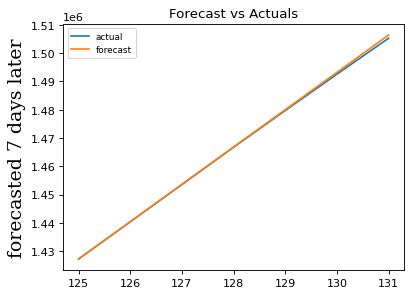

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=7
# Create Training and Test
train = df['death_Alpha_Global'][:len(df)-n_future]
test = df['death_Alpha_Global'][len(df)-n_future:]

model = ARIMA(train, order=(0, 2, 0))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Plot
font1 = {'family':'Serif','color':'black','size':17}
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 7 days later", fontdict = font1)
plt.show()


In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.00022349334266446726,
 'me': 333.5510204086812,
 'mae': 333.5510204086812,
 'mpe': 0.00022349334266446726,
 'rmse': 509.4370184842943}

                               SARIMAX Results                                
Dep. Variable:     death_Alpha_Global   No. Observations:                  118
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1170.519
Date:                Mon, 17 Apr 2023   AIC                           2351.039
Time:                        19:20:29   BIC                           2364.807
Sample:                             0   HQIC                          2356.628
                                - 118                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9743      2.483      0.795      0.427      -2.893       6.842
ar.L2         -0.9744      2.514     -0.388      0.698      -5.902       3.953
ma.L1         -2.0000      2.483     -0.806      0.4

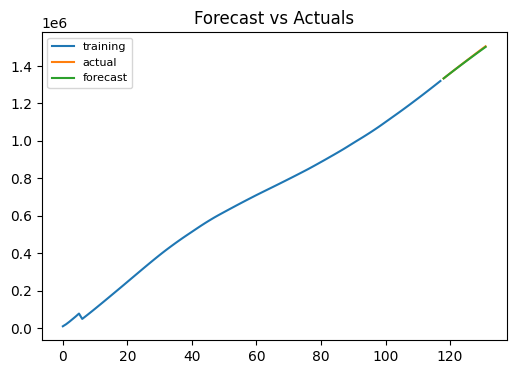

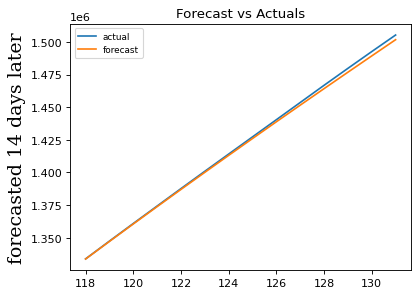

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=14
# Create Training and Test
train = df['death_Alpha_Global'][:len(df)-n_future]
test = df['death_Alpha_Global'][len(df)-n_future:]

model = ARIMA(train, order=(2, 2, 2))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Plot
font1 = {'family':'Serif','color':'black','size':17}
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 14 days later", fontdict = font1)
plt.show()


In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.0010235776743086555,
 'me': -1493.5291322088367,
 'mae': 1493.5291322088367,
 'mpe': -0.0010235776743086555,
 'rmse': 1887.997222379343}

                               SARIMAX Results                                
Dep. Variable:     death_Alpha_Global   No. Observations:                  111
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1915.373
Date:                Mon, 17 Apr 2023   AIC                           3840.747
Time:                        19:22:15   BIC                           3854.204
Sample:                             0   HQIC                          3846.204
                                - 111                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0001   4.66e-06    -31.377      0.000      -0.000      -0.000
ar.L2          0.9999    1.4e-06   7.12e+05      0.000       1.000       1.000
ma.L1      -5.425e-05   3.69e-05     -1.470      0.1

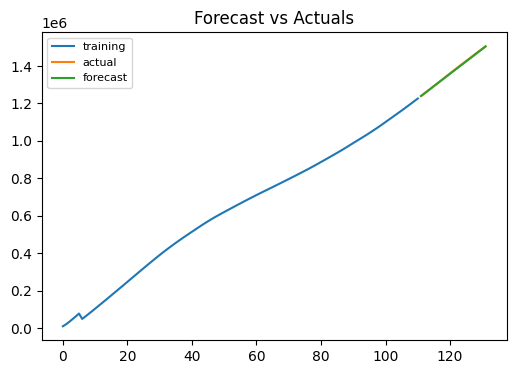

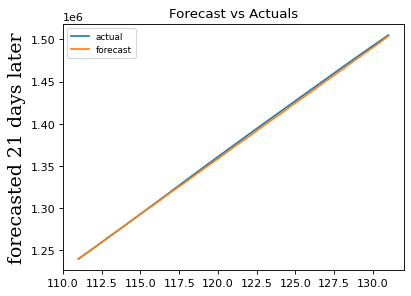

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=21
# Create Training and Test
train = df['death_Alpha_Global'][:len(df)-n_future]
test = df['death_Alpha_Global'][len(df)-n_future:]

model = ARIMA(train, order=(2, 2, 2))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Plot
font1 = {'family':'Serif','color':'black','size':17}
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 21 days later", fontdict = font1)
plt.show()


In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.0011503648075526943,
 'me': -1532.497647095139,
 'mae': 1617.6022611827634,
 'mpe': -0.0010823380796653737,
 'rmse': 1872.5651278813975}